<a href="https://colab.research.google.com/github/Ruphai/UBS/blob/main/Bayesian_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian Linear Regression

Lets now focus on Bayesian Linear Regression for which the objective consists in determining the relationship between some response variable ${\bf Y}$ and a set of $D$ predictor variables ${\bf X}=(x_1,\ldots,x_D)$ 
* Most common assumption $\rightsquigarrow$ Relation through some deterministic function $f$ and some additive (zero-mean) random error component $\epsilon$
  $${\bf Y}=f({\bf X})+{\bf \epsilon}$$
* In most situations the predictor variables, ${\bf X}$ are assumed to be observed without error so they are not considered as random
  $$\Rightarrow f({\bf X})=\mathbb{E}\left[ {\bf Y} |{\bf X}={\bf x} \right]$$
* Our aim is to determine $f(\cdot)$  so that we can uncover the true relationship between the response ${\bf y}^*$ a at predictor location ${\bf x}^*$ given by ${\bf y}^*=f({\bf x}^*)$<br/>
  <i>(generally only interested in estimating $f$ over some range of plausible predictor values)</i>
* The true regression function is unknown and we have no way of determining its analytic form exactly, even if one actually exists $\Rightarrow$ we must content ourselves with finding approx. to it which are close to the truth by making use of the observed dataset ${\cal D}=\left\{{\bf x}^{(i)},{\bf y}^{(i)}\right\}_{i=1}^N$
* A flexible choice consists in using models using \HIm{basis functions}:
    $$f({\bf x})\approx\sum_{i=1}^k \beta_i {\bf B}_i ({\bf x})$$
    where ${\bf \beta}=(\beta_1,\ldots,\beta_k)^T$ is the set of coefficients corresponding to basis functions ${\bf B}=({\bf B}_1,\ldots,{\bf B}_k)$. Basis functions are nonlinear transformations of the data vector ${\bf x}$ - some examples include: polynomial functions, radial basis functions, etc.
    


Lets assume that we want to model our $N$ data points ${\cal D}=\left\{{\bf x}^{(i)},{\bf y}^{(i)}\right\}_{i=1}^N$ as, $\text{for } j=1,\ldots,N$:
$${\bf y}^{(j)}=\sum_{i=1}^k \beta_i {\bf B}_i ({\bf x}^{(j)})+ \epsilon^{(j)} $$
where $\epsilon^{(j)}\sim {\cal N}({\bf 0}, \sigma^2 {\bf I})$ and for some specific choice of basis functions $\Rightarrow$ this is our choice of model.

In a matrix form, the complete set of observations can be written as follows:
    $${{\bf y}}={\bf B} {\bf \beta}+{ \epsilon}$$
where for univariate input (${x}^{(i)}$) and outputs (${y}^{(i)}$), we have
$${{\bf y}}=\begin{bmatrix}y_1\\\vdots\\y_N\end{bmatrix}$$
$${\bf \beta}=\begin{bmatrix}\beta_1\\\vdots\\\beta_k\end{bmatrix}$$
and
$${\bf B}=\begin{bmatrix}B_1(x_1)& B_2(x_1) & \cdots &  B_k(x_1) \\
                          \vdots & \ddots & & \vdots  \\
                          B_1(x_N) & B_2(x_N) & \cdots & B_k(x_N) 
                          \end{bmatrix}$$



## Likelihood function

Let us consider that the regression will be performed by choosing the polynomial function as basis functions, i.e. $B_n(x)=x^{n-1}$. As a consequence the matrix ${\bf B}$ is given by:

$${\bf B}=\begin{bmatrix}1& x_1 & \cdots &  x_1^{k-1} \\
                          \vdots & \ddots & & \vdots  \\
                          1 & x_N & \cdots & x_N^{k-1} 
                          \end{bmatrix}$$

Moreover, the error term vector $\epsilon$ in the model is assumed to follows a <a href="https://en.wikipedia.org/wiki/Multivariate_normal_distribution" target="_blank">multivariate normal distribution</a> with (**known and fixed**) covariance matrix $\Sigma_y(=\sigma^2 {\bf I})$. The likelihood function is therefore defined as follows:

\begin{align}
\begin{split}
p({\bf y}|{\bf \beta},{\bf x})&={\cal N}({\bf y};{\bf B}\beta,\Sigma_y)\\
&=\frac{1}{(2\pi)^{N/2} |\Sigma_y|^{1/2}}\exp\left(-\frac{1}{2}({\bf y}-{\bf B}\beta)^T \Sigma_y^{-1} ({\bf y}-{\bf B}\beta) \right)
\end{split}
\end{align}
where $|\Sigma_y|$ is the determinant of the matrix $\Sigma_y$.

## Prior distributions on unknown parameters $\beta$

A multivariate normal distribution will be chosen as prior distribution for the unknown random vector $\beta$. Different choices can be made but the Gaussian assumption is the one typically used in this setting due to the nice identities we have with this distribution - to be more precise in the vocabulary, we use the conjugacy property of this distribution under the defined likelihood. 

The prior distribution for the unknown parameters is then defined as:
\begin{align}
\begin{split}
p({\bf \beta})&={\cal N}({\bf \beta};{\bf \mu_\beta},\Sigma_\beta)\\
&=\frac{1}{(2\pi)^{k/2} |\Sigma_\beta|^{1/2}}\exp\left(-\frac{1}{2}(\beta- \mu_\beta)^T \Sigma_\beta^{-1} (\beta- \mu_\beta) \right)
\end{split}
\end{align}
where $\mu_\beta$ and $\Sigma_\beta$ are the mean vector and covariance matrix of the prior on $\beta$. Without any specific a priori knowledge on $\beta$, one typically chooses zero mean $\mu_\beta={\bf 0}$ and independent components with the same variance $\Sigma_\beta=\sigma_\beta^2{\bf I}$ 

## Numerical Examples

In this section, the regression will be performed by assuming
* independent training samples: $\Sigma_y=\sigma_y^2 {\bf I}$ in the likelihood,
* zero mean and independent regression coefficients $\beta_i$: $\mu_\beta={\bf 0}$ and $\Sigma_\beta=\sigma_\beta^2{\bf I}$ in the prior of $\beta$ 

### Prior distribution

In [ ]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats



def plot_posterior(mean, variance,indexComponent, ax=None):
    x = np.linspace(-20, 20, 10000)
    y = scipy.stats.norm.pdf(x, mean, np.sqrt(variance))
        
    if not ax:
        fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r"$\beta_{}$".format(indexComponent+1), fontsize=20)
    ax.set_ylabel(r"$P(\beta_{}|\cal D)$".format(indexComponent+1), fontsize=20)
    ax.set_title(r"Marginal Posterior of $\beta_{}$".format(indexComponent+1), fontsize=20);


In [ ]:
# Definition of the true function

def TrueFunc(x):
    return np.sin(4.5*x)



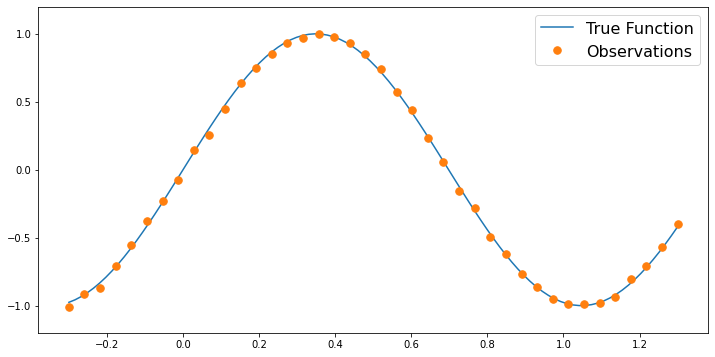

In [ ]:
# Generation of the samples that will constitute our training set
xMin=-0.3
xMax=1.3

numObs = 40
trueNoiseStd = 2e-2
obsLocs = np.linspace(xMin,xMax,numObs) # choose data points x equally spaced on [xMin;xMax]

obsData = TrueFunc(obsLocs) + trueNoiseStd*np.random.randn(numObs)
modelNoiseStd = trueNoiseStd
noiseCov = modelNoiseStd * np.eye(numObs) # Covariance matrix of the observations


numPlot = 100

plotx = np.linspace(xMin, xMax, numPlot)

plt.figure(figsize=(12,6))
plt.plot(plotx, TrueFunc(plotx),label='True Function')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Observations')

plt.ylim([-1.2,1.2])
plt.legend(fontsize=16)

In [ ]:
# Designing the matrix B containing the basis functions on the training set
polyOrder = 6 # number of polynoms/regression coefficients

B = np.ones((numObs,polyOrder))
for p in range(1,polyOrder): 
    B[:,p] = np.power(obsLocs, p)


In [ ]:
# Setting the values for the prior distribution on the regression coefficients
priorMean = np.zeros(polyOrder)
priorCov = (100)*np.eye(polyOrder)

### Predictive Prior

Lets take a look at the predictive prior - what will be our prediction without any training data.

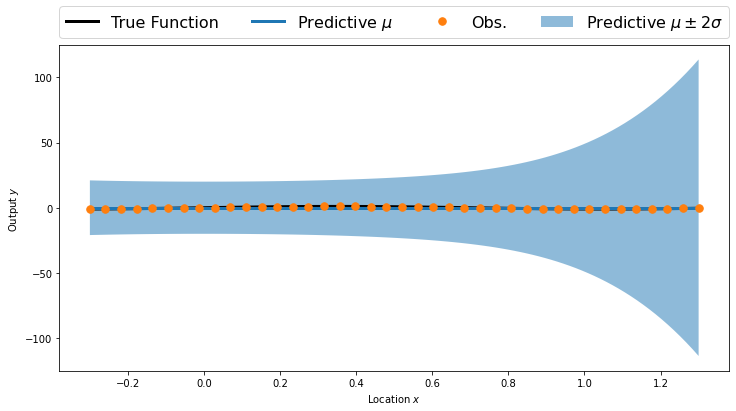

In [ ]:
predB = np.ones((numPlot,polyOrder))
for p in range(1,polyOrder): 
    predB[:,p] = np.power(plotx, p)
    
predMean = np.dot(predB, priorMean)
predCov = np.dot(predB, np.dot(priorCov, predB.T))

predStd = np.sqrt(np.diag(predCov))


plt.figure(figsize=(12,6))

plt.fill_between(plotx, predMean-2.0*predStd, predMean+2.0*predStd, alpha=0.5, label='Predictive $\mu\pm2\sigma$')
plt.plot(plotx
         , TrueFunc(plotx), 'k', linewidth=3, label='True Function')
plt.plot(plotx, predMean, linewidth=3, label='Predictive $\mu$')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Obs.')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=16)
plt.xlabel('Location $x$')
plt.ylabel('Output $y$')
plt.show()

#### Zooming in on the output of the predictive mean based on the transformation using a polynomial basis function. 

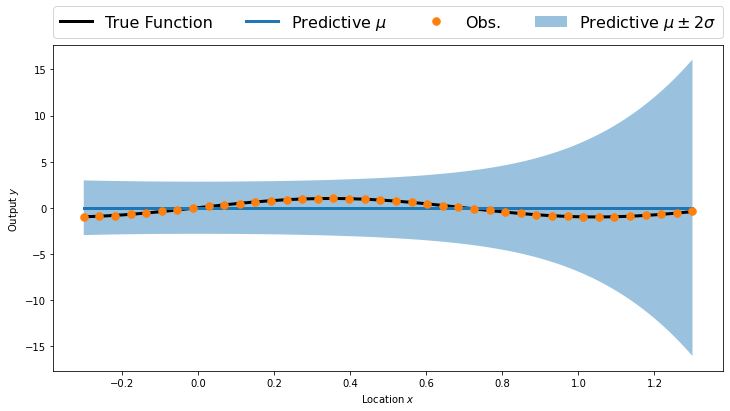

In [ ]:
priorCov = (2)*np.eye(polyOrder)
predB = np.ones((numPlot,polyOrder))
for p in range(1,polyOrder): 
    predB[:,p] = np.power(plotx, p)
    
predMean = np.dot(predB, priorMean)
predCov = np.dot(predB, np.dot(priorCov, predB.T))

predStd = np.sqrt(np.diag(predCov))


plt.figure(figsize=(12,6))

plt.fill_between(plotx, predMean-2.0*predStd, predMean+2.0*predStd, alpha=0.45, label='Predictive $\mu\pm2\sigma$')
plt.plot(plotx
         , TrueFunc(plotx), 'k', linewidth=3, label='True Function')
plt.plot(plotx, predMean, linewidth=3, label='Predictive $\mu$')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Obs.')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=16)
plt.xlabel('Location $x$')
plt.ylabel('Output $y$')
plt.show()

<span style='font-weight:bold;color:red'> -------------------------- <br/>
    <b> Question 1 - Comment these results.</b> <br/> -------------------------- </span> 

In the graphical representation of the bayesian system above, we can see a display of the prior to predict the mean and standard deviation of the system on observed data (containing noise) and the exact computation of the expected value of y (without noise). In this case, the true function represents the expected value of y given the function f(x) = sin(4.5x), while the predictive mean represent the prior mean of the system without noise.

In this case, it was set to 0 upon initialisation and it remains the same after transformation with a polynomial basis function. Largely because this is the prior data without any training data. A good point to note is the strong similarity between the distribution of the true function and the observation value (which contains some noise and variances from the mean). Despite this strong similarity, this bayesian system is only confident of the expected value of this system when x is between value -0.3 to about 0.8 after which the spread in the data begin to increase.

### Posterior Distribution

Lets now compute the posterior distribution - as seen in the lecture, due to the conjugacy property of the Gaussian asusmption of both the prior and the likelihood, the posterior distribution of the parameters $\beta$, $p(\beta|{\bf y},{\bf x})$ will also be a multivariate normal distribution, i.e.

$$p(\beta|\underbrace{{\bf y},{\bf x}}_{\cal D})={\cal N}({\bf \beta};{\bf \tilde{\mu}_\beta},\tilde{\Sigma}_\beta)$$
where
\begin{align}
\begin{split}
\tilde{\mu}_\beta & = {\mu}_\beta + {\Sigma}_\beta {\bf B}^T [{\bf B}{\Sigma}_\beta {\bf B}^T + {\Sigma}_y]^{-1} ({\bf y}-{\bf B}{\mu}_\beta) \\
\tilde{\Sigma}_\beta &= \left({\bf I}-{\Sigma}_\beta {\bf B}^T [{\bf B}{\Sigma}_\beta {\bf B}^T + {\Sigma}_y]^{-1} {\bf B}\right) {\Sigma}_\beta
\end{split}
\end{align}

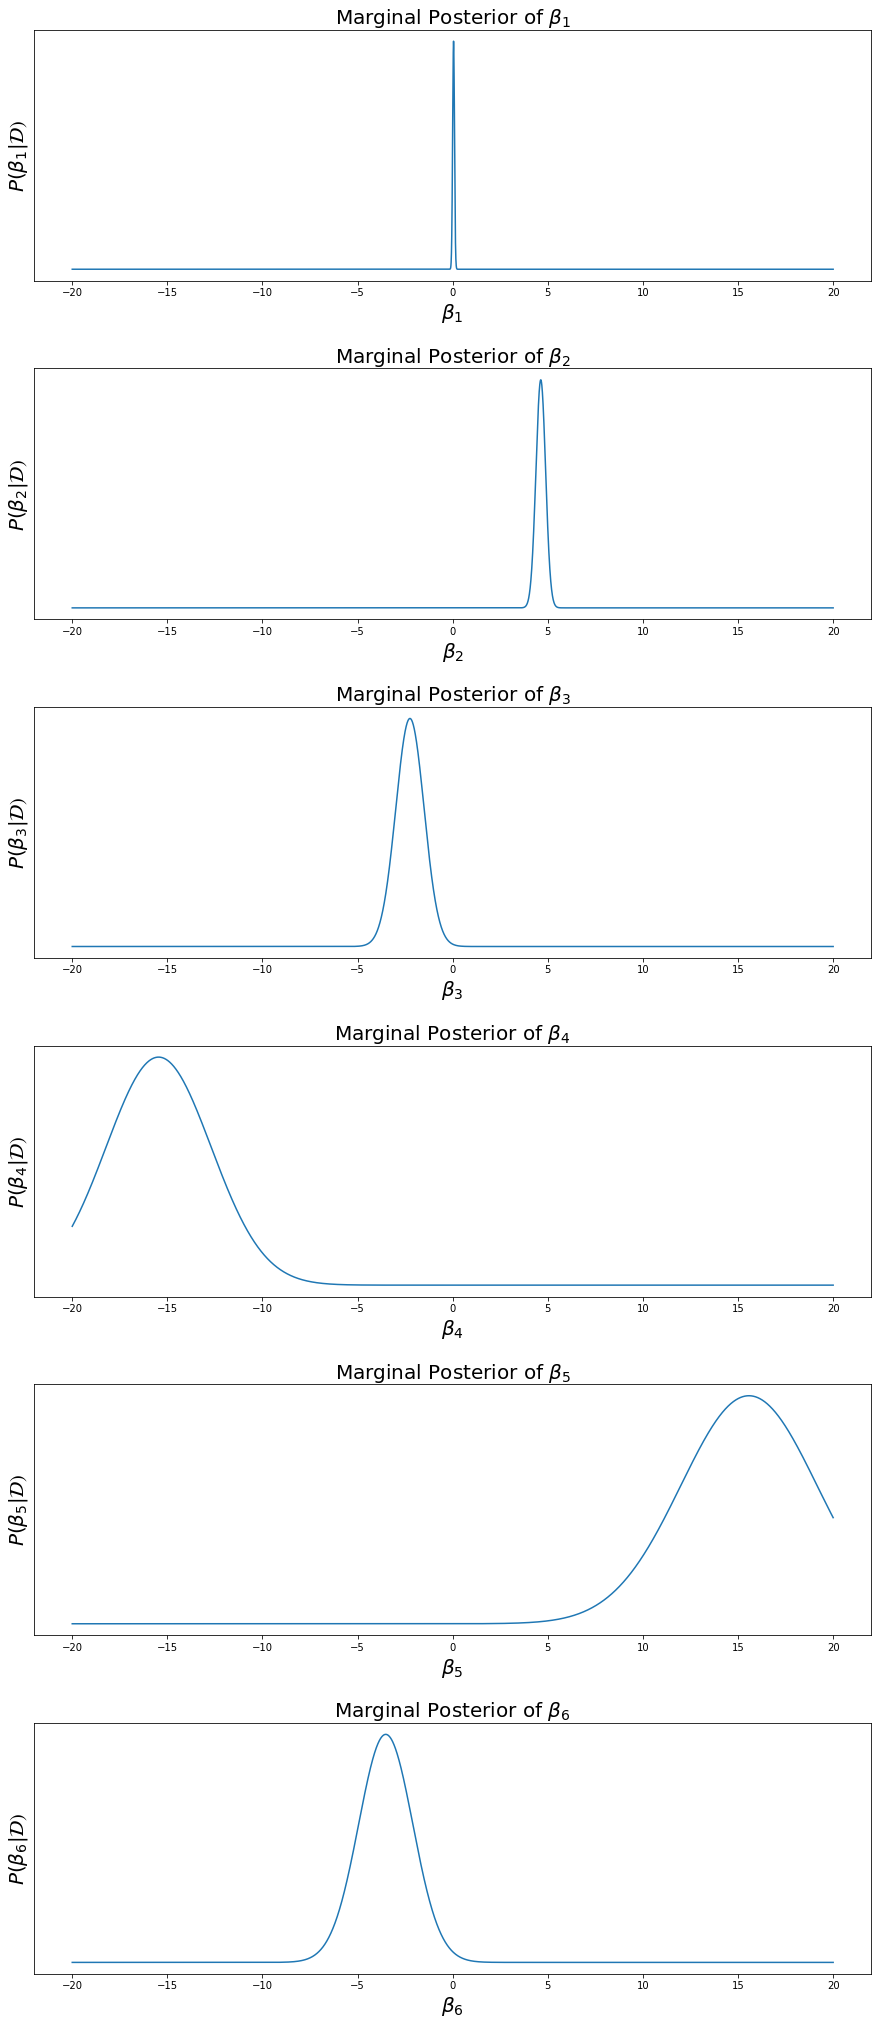

In [ ]:
predCov=np.dot(np.dot(B,priorCov),B.T)+noiseCov
predMean=np.dot(B,priorMean)

ProductK=np.dot(np.dot(priorCov,B.T),np.linalg.inv(predCov))

postMean=priorMean+np.dot(ProductK,(obsData-predMean))
postCov=np.dot((np.eye(polyOrder)-np.dot(ProductK,B)),priorCov)
#print(postMean)
#print(postCov)


BetaGrid = np.linspace(-10, 10, 1000)


fig, axes = plt.subplots(nrows=polyOrder,figsize=(15,15))
fig.tight_layout()#(wspace = 0.2)
for i in range(polyOrder):
    plot_posterior(postMean[i],postCov[i,i],i, ax=axes[i])
    axes[i].set_yticks([])
    

plt.subplots_adjust(left=0.125,
                    bottom=0, 
                    right=0.9, 
                    top=1.8, 
                    wspace=10, 
                    hspace=0.35)    

plt.show()

<span style='font-weight:bold;color:red'> -------------------------- <br/>
    Question 2 - Comment these results.<br/> -------------------------- </span> 

The output above, shows the partitioning of the gaussian random vector provided using a polynomial basis function of order 6. At each order, we could different attribution of weight to the variance of the distribution and the shifting of the mean value. This in itself is the display of the probabilistic model at different level of complexity given by the basis function we used. 
In this case, the value of the spread of the values were relatively small for the first two order with a more values distributed around the mean values. This potentially poses the risks of overfitting and over-complexity of the model. This bring to mind the case of the bias-variance trade-off in machine learning. 
At order 4 and 5, the marginal posterior distribution shows strong biases to different portion of the data and with a strong indication of both negative and positive values, respectively. While the final distribtion capture a more balanced distribution but with a relatively more spread compared to 1 and 2. 
Overall, this marginal distribution shows that the individual marginal transformation of the data are capable of capturing just a sub-section of the data really well. Outside of which, they will fail to accurately predict the data.


### Predictive Posterior Distribution

Lets now compute the predictive posterior distribution. This distribution allows us to obtain the full distribution (with a measure of uncertainty) of the response $y^*$ at some new predictor value $x^*$. As seen in the lecture, this pdf is given by:
$$p(y^*|x^*,{\cal D})=\int p(y^*|x^*,\beta,{\cal D}) {p(\beta|{\cal D})} d\beta $$
where ${\cal D}=\left\{{\bf x}^{(i)},{\bf y}^{(i)}\right\}_{i=1}^N$ is the full training set. From our results derived before, the posterior distribution of the parameters $p(\beta|{\cal D})$ is a multivariate normal distribution 


- as seen in the lecture, due to the conjugacy property of the Gaussian asusmption of both the prior and the likelihood, the posterior distribution of the parameters $\beta$,  will also be a multivariate normal distribution - more precisely $$p(\beta|{\bf y},{\bf x})={\cal N}({\bf \beta};{\bf \tilde{\mu}_\beta},\tilde{\Sigma}_\beta)$$ 

- observations $y*$ are assumed to be independent given $\beta$ and the location $x^*$ and have the following linear form:
 $${{y}^*}={\bf b}_{x^*}{\bf \beta}+{ \epsilon}$$
with $\epsilon \sim {\cal N}({\bf 0}, \sigma^2 )$ and ${\bf b}_{x^*}=\begin{bmatrix}B_1(x^*)& B_2(x^*) & \cdots &  B_k(x)
                          \end{bmatrix}$
                          
                          
                          
As a consequence, it is obvious that the predictive posterior distribution of the new response $y^*$ at a new location $x^*$ is given by:
$$p(y^*|x^*,{\cal D})={\cal N}\left(y^*; {\bf b}_{x^*}{\bf \tilde{\mu}_\beta}, {\bf b}_{x^*} \tilde{\Sigma}_\beta {\bf b}_{x^*}^T + \sigma^2 \right)$$

In [ ]:
predMean = np.dot(predB, postMean)
predCov = np.dot(predB, np.dot(postCov, predB.T))

predStd = np.sqrt(np.diag(predCov))

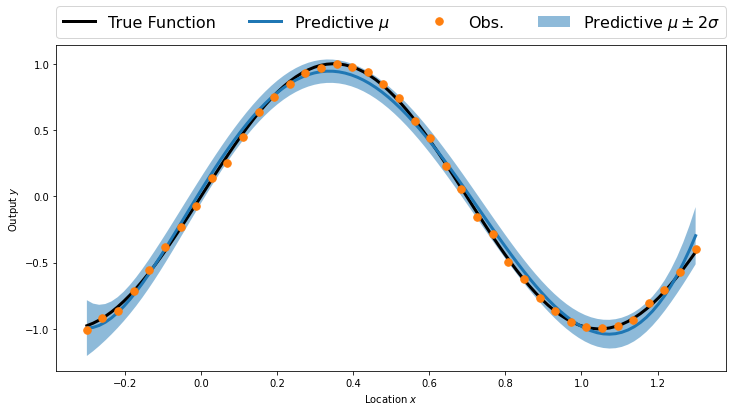

In [ ]:
plt.figure(figsize=(12,6))

plt.fill_between(plotx, predMean-2.0*predStd, predMean+2.0*predStd, alpha=0.5, label='Predictive $\mu\pm2\sigma$')
plt.plot(plotx
         , TrueFunc(plotx), 'k', linewidth=3, label='True Function')
plt.plot(plotx, predMean, linewidth=3, label='Predictive $\mu$')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Obs.')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=16)
plt.xlabel('Location $x$')
plt.ylabel('Output $y$')
plt.show()

<span style='font-weight:bold;color:red'> -------------------------- <br/>
    <b>Question 3 - Comment these results. </b> <br/> -------------------------- </span> 
 
In this case, we set up a simple predictive probabilistic model to capture the mean and variance for modelling the observation data. The predictive mean follows a similar pattern like the true function (without any variance) giving the value of output y in the range -1 to 1. This distribution shows the prediction of the distributed values based on the posterior model capturing the likelihood, prior and training data. 
In all, this prediction utilizes the posterior values of the mean to predict the parameters for this new distribution. The variance also revolves around the data and provide well distributed confidence levels in the data. 

### Predictive Posterior Distribution: Adjusted values

##### Change noise levels

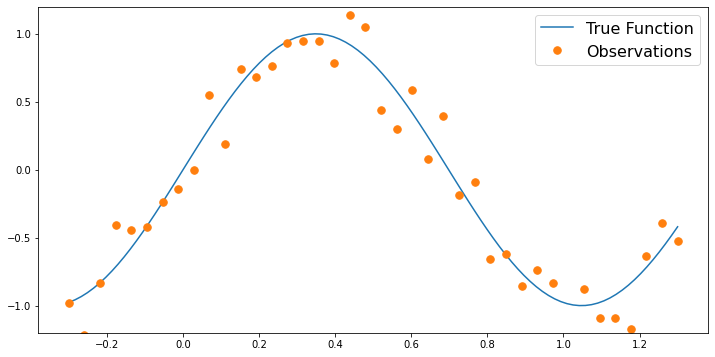

In [ ]:
# Generation of the samples that will constitute our training set: change noise levels
xMin=-0.3
xMax=1.3

numObs = 40
trueNoiseStd = 2e-1
obsLocs = np.linspace(xMin,xMax,numObs) # choose data points x equally spaced on [xMin;xMax]

obsData = TrueFunc(obsLocs) + trueNoiseStd*np.random.randn(numObs)
modelNoiseStd = trueNoiseStd
noiseCov = modelNoiseStd * np.eye(numObs) # Covariance matrix of the observations


numPlot = 100

plotx = np.linspace(xMin, xMax, numPlot)

plt.figure(figsize=(12,6))
plt.plot(plotx, TrueFunc(plotx),label='True Function')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Observations')

plt.ylim([-1.2,1.2])
plt.legend(fontsize=16)

In [ ]:
predMean = np.dot(predB, postMean)
predCov = np.dot(predB, np.dot(postCov, predB.T))

predStd = np.sqrt(np.diag(predCov))

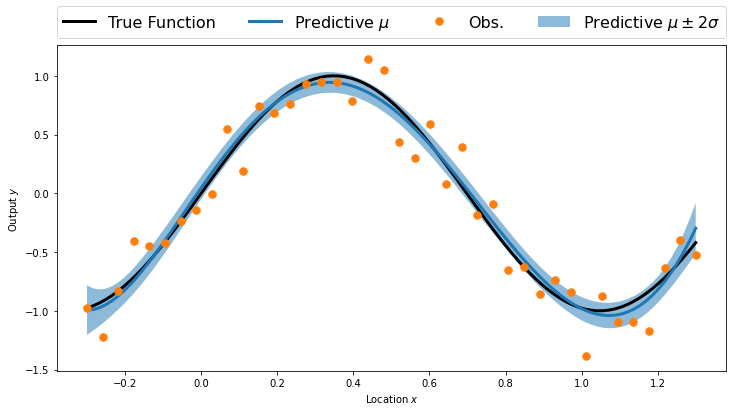

In [ ]:
plt.figure(figsize=(12,6))

plt.fill_between(plotx, predMean-2.0*predStd, predMean+2.0*predStd, alpha=0.5, label='Predictive $\mu\pm2\sigma$')
plt.plot(plotx
         , TrueFunc(plotx), 'k', linewidth=3, label='True Function')
plt.plot(plotx, predMean, linewidth=3, label='Predictive $\mu$')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Obs.')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=16)
plt.xlabel('Location $x$')
plt.ylabel('Output $y$')
plt.show()

##### Change the order of the Polynomial

In [ ]:
# Designing the matrix B containing the basis functions on the training set
polyOrder = 9 # number of polynoms/regression coefficients

B = np.ones((numObs,polyOrder))
for p in range(1,polyOrder): 
    B[:,p] = np.power(obsLocs, p)

priorMean = np.zeros(polyOrder)
priorCov = (100)*np.eye(polyOrder)

predB = np.ones((numPlot,polyOrder))

for p in range(1,polyOrder): 
    predB[:,p] = np.power(plotx, p)
    
predMean = np.dot(predB, priorMean)
predCov = np.dot(predB, np.dot(priorCov, predB.T))

predStd = np.sqrt(np.diag(predCov))

In [ ]:
predCov=np.dot(np.dot(B,priorCov),B.T)+noiseCov
predMean=np.dot(B,priorMean)

ProductK=np.dot(np.dot(priorCov,B.T),np.linalg.inv(predCov))
postMean=priorMean+np.dot(ProductK,(obsData-predMean))
postCov=np.dot((np.eye(polyOrder)-np.dot(ProductK,B)),priorCov)

In [ ]:
predMean = np.dot(predB, postMean)
predCov = np.dot(predB, np.dot(postCov, predB.T))

predStd = np.sqrt(np.diag(predCov))

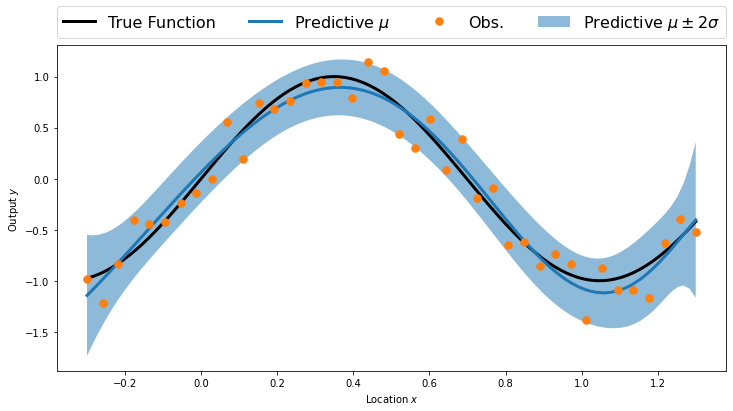

In [ ]:
plt.figure(figsize=(12,6))

plt.fill_between(plotx, predMean-2.0*predStd, predMean+2.0*predStd, alpha=0.5, label='Predictive $\mu\pm2\sigma$')
plt.plot(plotx
         , TrueFunc(plotx), 'k', linewidth=3, label='True Function')
plt.plot(plotx, predMean, linewidth=3, label='Predictive $\mu$')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Obs.')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=16)
plt.xlabel('Location $x$')
plt.ylabel('Output $y$')
plt.show()

##### Change the number of samples

In [ ]:
# Designing the matrix B containing the basis functions on the training set
sample_size = 200
plotx_new = np.linspace(xMin, xMax, sample_size)

polyOrder = 6 # number of polynoms/regression coefficients

B = np.ones((numObs,polyOrder))

for p in range(1,polyOrder): 
    B[:,p] = np.power(obsLocs, p)

priorMean = np.zeros(polyOrder)
priorCov = (100)*np.eye(polyOrder)

predB = np.ones((sample_size,polyOrder))

for p in range(1,polyOrder): 
    predB[:,p] = np.power(plotx_new, p)
    
predMean = np.dot(predB, priorMean)
predCov = np.dot(predB, np.dot(priorCov, predB.T))

predStd = np.sqrt(np.diag(predCov))

In [ ]:
predCov=np.dot(np.dot(B,priorCov),B.T)+noiseCov
predMean=np.dot(B,priorMean)

ProductK=np.dot(np.dot(priorCov,B.T),np.linalg.inv(predCov))
postMean=priorMean+np.dot(ProductK,(obsData-predMean))
postCov=np.dot((np.eye(polyOrder)-np.dot(ProductK,B)),priorCov)

In [ ]:
predMean = np.dot(predB, postMean)
predCov = np.dot(predB, np.dot(postCov, predB.T))

predStd = np.sqrt(np.diag(predCov))

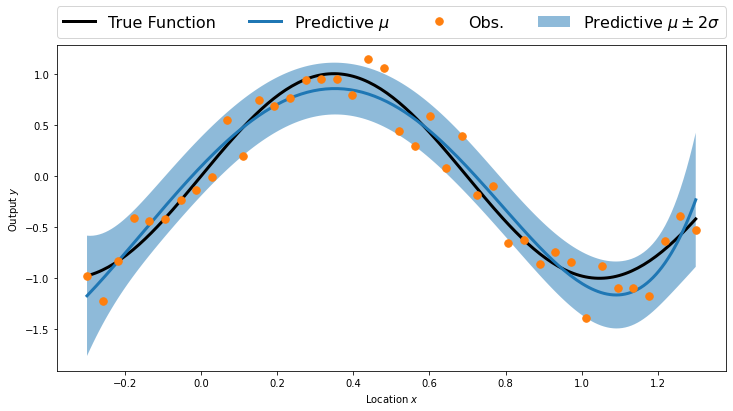

In [ ]:
plt.figure(figsize=(12,6))

plt.fill_between(plotx_new, predMean-2.0*predStd, predMean+2.0*predStd, alpha=0.5, label='Predictive $\mu\pm2\sigma$')
plt.plot(plotx_new
         , TrueFunc(plotx_new), 'k', linewidth=3, label='True Function')
plt.plot(plotx_new, predMean, linewidth=3, label='Predictive $\mu$')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Obs.')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=16)
plt.xlabel('Location $x$')
plt.ylabel('Output $y$')
plt.show()

##### Criterion for deciding the best parameters
In the adjustment of the posterior prediction parameters, **we could tell depending on whether we have large or small datasets**,  we can select multiple criterion to best our data. In a very noisy data, we can potentially increase the order of the polynomial basis function. But we should note that, while increasing the polynomial order better captures all the variations in the data, it also significantly increases the variances in the data implying that the prediction could potentially be far away from the true value. 
As stated earlier, generally increasing the noise level in our datasets increases the variances and **pushes the predicted values far away from the true value** as seen in the section of adjusting noise.
Increasing the number of data points also significantly helps to improve model and reduce the variance in the probability distribution.

<span style='font-weight:bold;color:red'> -------------------------- <br/>
    Question 4 - Change the value respectively of  </span> 
    <ul>
       <span style='font-weight:bold;color:red'> <li> the noise level $\sigma^2$ in the data</li>
        <li>the order of polynoms $k$ </li>
        <li>the number of data samples $N$ </li>
    </span>
    </ul>
   <span style='font-weight:bold;color:red'> Try to understand the impact of each of these values. <br/>
    What could be a measure that could be used to decide between all these different choices (i.e. choice of parameters) ? Implement the computation of such criterion. <br/> -------------------------- </span> 



<span style='color:gray;float:right'>----
    *Rufai Balogun - Copernicus Master in Digital Earth*</span>